# Hypothesis

Phishing websites have unique features and patterns that can allow a model to distinguish and classify them from legitimate websites. My goal is to demonstrate that a supervised model can be trained to achieve this with relative ease.

## Data Source

- **Phishing Websites Dataset**  
    [Phishing Websites](https://archive.ics.uci.edu/dataset/327/phishing+websites)  
    Mohammad, R. & McCluskey, L. (2012). *Phishing Websites [Dataset]*. UCI Machine Learning Repository. [https://doi.org/10.24432/C51W2X](https://www.semanticscholar.org/paper/An-assessment-of-features-related-to-phishing-using-Mohammad-Thabtah/0c0ff58063f4e078714ea74f112bc709ba9fed06).

- **PhiUSIIL Phishing URL (Website) Dataset**  
    [PhiUSIIL Phishing URL Dataset](https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)  
    Prasad, A. & Chandra, S. (2024). *PhiUSIIL Phishing URL (Website) [Dataset]*. UCI Machine Learning Repository. [https://doi.org/10.1016/j.cose.2023.103545](https://doi.org/10.1016/j.cose.2023.103545).

# Process Overview

1. **Model Creation**  
    I will design and implement my own supervised machine learning model to classify phishing websites. The model will be trained using the datasets mentioned above.

2. **Outcome Analysis**  
    After training the model, I will analyze its performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Visualizations will also be used to better understand the model's predictions.

3. **Comparison with Published Results**  
    The performance of my model will be compared with the predictions and results reported in the two referenced papers:
    - *Phishing Websites Dataset* by Mohammad & McCluskey (2012)
    - *PhiUSIIL Phishing URL Dataset* by Prasad & Chandra (2024)

    This comparison will help assess the effectiveness of my model and identify areas for improvement.

In [ ]:

#package to add ucimlrepo to the python path

!pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 

# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 
  
  


In [3]:
from pprint import pprint

# data (as pandas dataframes) 
X1 = phishing_websites.data.features 
y1 = phishing_websites.data.targets 
  
# metadata 
print(phishing_websites.metadata)
  
# variable information 
print(phishing_websites.variables) 

print(f"Number of rows in X1: {len(X1)}")
print(f"Number of rows in y1: {len(y1)}")

{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

In [4]:
# data (as pandas dataframes) 
X2 = phiusiil_phishing_url_website.data.features 
y2 = phiusiil_phishing_url_website.data.targets 
  
# metadata 
print(phiusiil_phishing_url_website.metadata) 
  
# variable information 
print(phiusiil_phishing_url_website.variables) 

print(f"Number of rows in X1: {len(X2)}")
print(f"Number of rows in y1: {len(y2)}")

{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

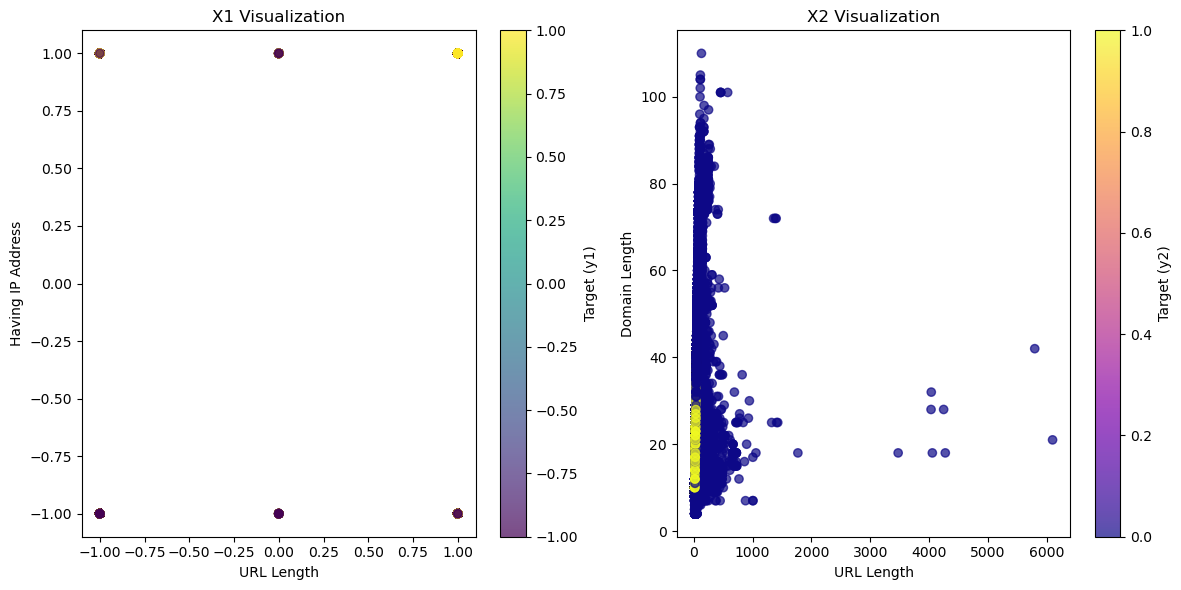

In [ ]:
import matplotlib.pyplot as plt

# Visualize X1 and y1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X1['url_length'], X1['having_ip_address'], c=y1['result'], cmap='viridis', alpha=0.7)
plt.title('X1 Visualization')
plt.xlabel('URL Length')
plt.ylabel('Having IP Address')
plt.colorbar(label='Target (y1)')

# Visualize X2 and y2
plt.subplot(1, 2, 2)
plt.scatter(X2['URLLength'], X2['DomainLength'], c=y2['label'], cmap='plasma', alpha=0.7)
plt.title('X2 Visualization')
plt.xlabel('URL Length')
plt.ylabel('Domain Length')
plt.colorbar(label='Target (y2)')

plt.tight_layout()
plt.show()